In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x) # z=WX+b W=1, b=0

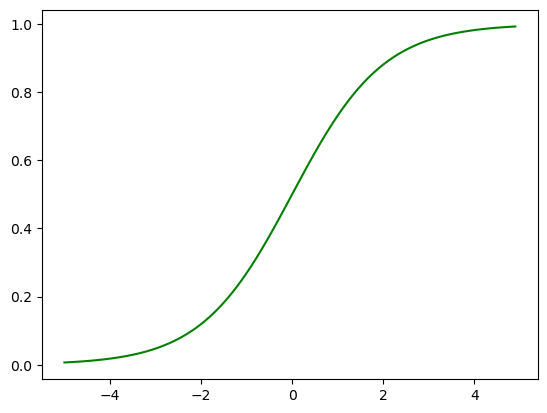

In [4]:
plt.plot(x, y, 'g') 

In [5]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)

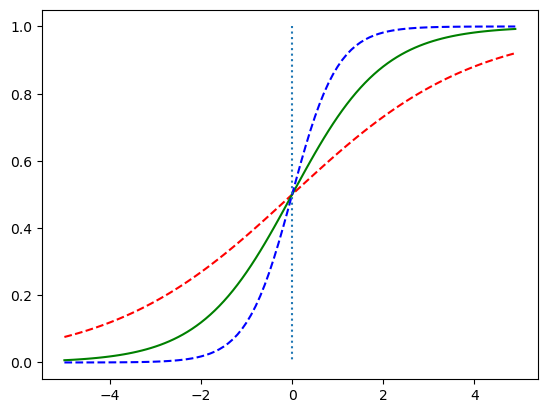

In [6]:
plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0.0, 0.0], [1.0,0.0], ':')

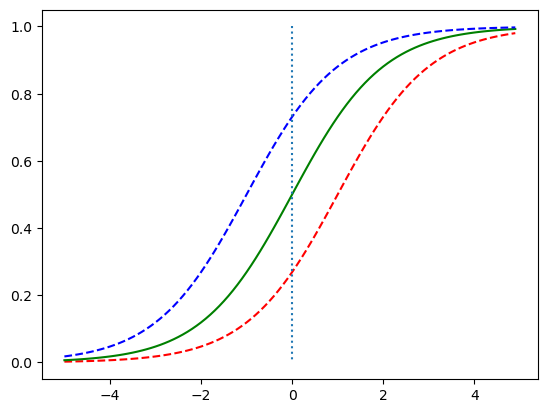

In [7]:
y1=sigmoid(x-1)
y2=sigmoid(x)
y3=sigmoid(x+1)
plt.plot(x, y1,'r', linestyle='--')
plt.plot(x, y2,'g')
plt.plot(x, y3,'b', linestyle='--')
plt.plot([0.0, 0.0],[1.0, 0.0],':')

In [12]:
x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1)   
t_data = np.array([0, 0, 0, 0,  0,  0,  1,  1,  1,  1]).reshape(10,1)
w=np.random.rand(1,1)
b=np.random.rand(1)
print(w, b)

[[0.32098124]] [0.48313106]


In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
def loss_func(x, t):
    delta=1e-7
    z=np.dot(x,w)+b
    y=sigmoid(z)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

In [14]:
def predict(x):
    z=np.dot(x, w)+b
    y=sigmoid(z)
    if y>0.5:
        result=1
    else:
        result=0
    return y, result

In [11]:
def numerical_derivative(f,x):
    delta_x=1e-4
    grad=np.zeros_like(x)

    it=np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx]=float(tmp_val)+delta_x
        fx1=f(x)
        x[idx]=float(tmp_val)-delta_x
        fx2=f(x)
        grad[idx]=(fx1-fx2)/(2*delta_x)

        x[idx]=tmp_val
        it.iternext()

    return grad

In [13]:
learning_rate=1e-2
f=lambda x: loss_func(x_data, t_data)
print("Initial error value=", loss_func(x_data, t_data), 'Initial w=',w,'b=',b)

for step in range(30001):
    w-=learning_rate*numerical_derivative(f, w)
    b-=learning_rate*numerical_derivative(f, b)

    if step % 400==0:
        print('step:', step, 'error value:', loss_func(x_data, t_data), "w=",w, 'b=','b')

Initial error value= 17.00216112776734 Initial w= [[0.32098124]] b= [0.48313106]
step: 0 error value: 8.720016342326838 w= [[-0.0736536]] b= b
step: 400 error value: 2.7448997913748014 w= [[0.2848793]] b= b
step: 800 error value: 1.773611386561582 w= [[0.4559293]] b= b
step: 1200 error value: 1.512099919299766 w= [[0.53265739]] b= b
step: 1600 error value: 1.3485037991643303 w= [[0.59356897]] b= b
step: 2000 error value: 1.2330696826599752 w= [[0.64486013]] b= b
step: 2400 error value: 1.1455485940891033 w= [[0.68960279]] b= b
step: 2800 error value: 1.0759458066025456 w= [[0.72956058]] b= b
step: 3200 error value: 1.018679521509394 w= [[0.76584717]] b= b
step: 3600 error value: 0.9703513794609593 w= [[0.79921455]] b= b
step: 4000 error value: 0.9287558044151092 w= [[0.83019643]] b= b
step: 4400 error value: 0.8923890198891157 w= [[0.85918652]] b= b
step: 4800 error value: 0.8601847438708021 w= [[0.88648429]] b= b
step: 5200 error value: 0.8313623667691634 w= [[0.91232332]] b= b
step: 

In [15]:
predict(9)

(array([[0.00118565]]), 0)

In [16]:
predict(15)

(array([[0.97107693]]), 1)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
x_data1 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1)   
t_data1 = np.array([0, 0, 0, 0,  0,  0,  1,  1,  1,  1]).reshape(10,1)
x_train=torch.from_numpy(x_data1).float()
t_train=torch.from_numpy(t_data1).float()
print(x_train)
print(t_train)

tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.],
        [14.],
        [16.],
        [18.],
        [20.]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [19]:
w=torch.zeros((1,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([[0.]], requires_grad=True)
tensor([0.], requires_grad=True)


In [21]:
optimizer=optim.SGD([w,b], lr=0.1)
epochs=1001

In [23]:
for epoch in range(epochs):
    z=x_train.matmul(w)+b
    y=torch.sigmoid(z)
    cost=-(t_train*torch.log(y)+(1-t_train)*torch.log(1-y)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100==0:
        print(epoch, cost.item(), w.item(), b.item())

0 0.16117726266384125 0.5010557770729065 -6.276482105255127
100 0.15538892149925232 0.5190743207931519 -6.516242027282715
200 0.15025773644447327 0.5360519289970398 -6.741994857788086
300 0.14566583931446075 0.5521240830421448 -6.955566883087158
400 0.14152270555496216 0.5674008131027222 -7.15844202041626
500 0.13775786757469177 0.5819724798202515 -7.351841449737549
600 0.13431555032730103 0.5959141850471497 -7.536776542663574
700 0.13115081191062927 0.6092894077301025 -7.714102745056152
800 0.12822706997394562 0.6221520304679871 -7.884548187255859
900 0.12551413476467133 0.6345483660697937 -8.048735618591309
1000 0.12298701703548431 0.6465182900428772 -8.20720386505127


In [26]:
x_test=torch.FloatTensor([[9],[15]])
y2=torch.sigmoid(x_test.matmul(w)+b)
result=y2>0.5
print(y2)
print(result.float())

tensor([[0.0841],
        [0.8162]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [1.]])


In [27]:
torch.manual_seed(1)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train)
print(y_train)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [28]:
model=nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [29]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]


In [30]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [33]:
optimizer=optim.SGD(model.parameters(), lr=0.1)
epochs=1001
costs=[]
accuracys=[]

In [34]:
for epoch in range(epochs):
    h=model(x_train)
    cost=F.binary_cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    costs.append(cost.item())
    pred=h>torch.FloatTensor([0.5])
    correct_pred=pred.float()==y_train
    accuracy=correct_pred.sum().item()/len(correct_pred)
    accuracys.append(accuracy)

    if epoch%100==0:
        print(epoch, cost.item(), accuracy)

0 0.5397130846977234 0.8333333333333334
100 0.4076883792877197 0.8333333333333334
200 0.34564945101737976 0.8333333333333334
300 0.29832255840301514 0.8333333333333334
400 0.26117900013923645 0.8333333333333334
500 0.2316325306892395 1.0
600 0.20777933299541473 1.0
700 0.18822990357875824 1.0
800 0.17197585105895996 1.0
900 0.15828156471252441 1.0
1000 0.1466050148010254 1.0


In [37]:
pred1=model(x_train)
result=pred1>0.5
print(pred1)
print(result.float())

tensor([[0.0295],
        [0.1571],
        [0.2988],
        [0.7841],
        [0.9413],
        [0.9808]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


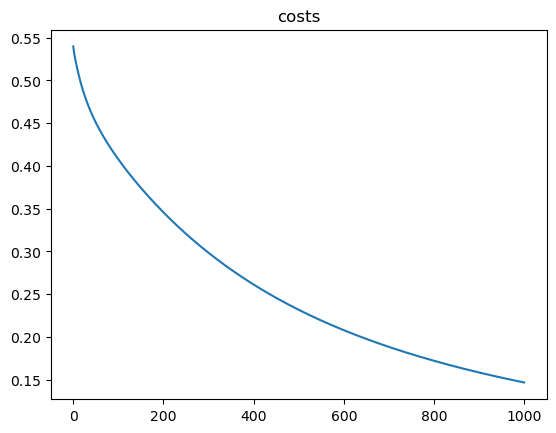

In [40]:
import pandas as pd
s1=pd.Series(costs)
plt.plot(s1)
plt.title('costs')
plt.show()

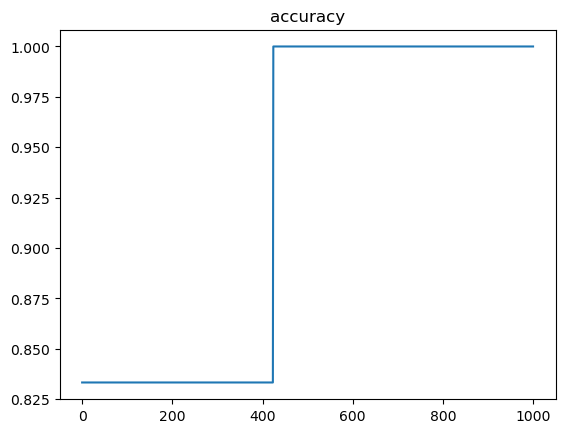

In [41]:
s2=pd.Series(accuracys)
plt.plot(s2)
plt.title('accuracy')
plt.show()

In [53]:
df=pd.read_csv('../data/data-01-test-score.csv', header=None)
x_data=df.values[:,:-1]
y_data=df.values[:, -1]
x_train=torch.from_numpy(x_data).float()
y_train=torch.from_numpy(y_data).float()
y_mean=torch.mean(y_train)
y_train=(y_train>y_mean).float()
y_train=y_train.view([-1, 1])
y_train

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]])

In [55]:
print(x_train)
print(y_train)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]])
tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
     

In [42]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(2, 1)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))